# How to use a QComponent

For convenience, let's begin by enabling [automatic reloading of modules](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) when they change.

In [1]:
%load_ext autoreload
%autoreload 2

Now, let's import Qiskit Metal:

In [2]:
import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs

%metal_heading Welcome to Qiskit Metal!

Just as we did in the "Start Here" notebook, we'll open the Qiskit Metal GUI and work with simple planar designs:

In [3]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

Let's load a QComponent with all default options, corresponding to a transmon qubit. This particular QComponent is stored in the library qiskit_metal.qlibrary.qubits and we'll create a new object of the class TransmonPocket. 

In [4]:
# Select a QComponent to create (The QComponent is a python class named `TransmonPocket`)
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket

# Create a new qcomponent object  
q1 = TransmonPocket(design)
gui.rebuild()  # rebuild the design and plot 

We see that this QComponent consists of two large metallic pads with a thin strip of metal connecting them, corresponding to a Josephson Junction. The transmon qubit is centered at the origin by default. In the GUI, we can see that the ID assigned to our QComponent is "1" and that the QComponent class is "Transmon Pocket." 

Note that since we didn't give the Qcomponent an explicit name, one was assigned automatically ("Pocket_1") which we can also see in the GUI. Taking a look at the actual qcomponent python script, we see that there is a "short name" defined in the qcomponent metadata (short_name = "Pocket" in the dictionary), which is where this name comes from. 

It is easy to give a specific name to a Qcomponent object. We can delete the QComponent "Pocket_1" by just clicking the "Delete all" button in the Qiskit Metal GUI. Alternatively, this can done by executing the following command, which deletes all components in the design (more on deleting later in this tutorial): 

In [5]:
# Delete all QComponents in our design, which in this case is just the transmon pocket "Pocket_1"
design.delete_all_components()
gui.rebuild()  # rebuild the design and plot 

Then, we can create the same transmon pocket with the name "Q1" by typing the command:

In [6]:
# Create a new qcomponent object with name 'Q1' 
q1 = TransmonPocket(design, 'Q1')
gui.rebuild()  # rebuild the design and plot 

The QComponent we've just created as a name "Q1" and a Qcomponent ID of 2, since an ID of 1 was already used for the now-deleted "Pocket_1" object. It is worth noting that the QComponent we've just created is not functional yet; it's just two rectangular metal pads with a thin strip of metal connecting them. In order for a QComponent to be functional in an actual design, we will need to add a few additional things, such as qpins defining where the transmon pocket connects to coplanar waveguides (CPWs). We will discuss this in more detail later in the tutorial. 

# QComponent Default Options

QComponents come with some default options, which are used in the make function of the qcomponent to create the qgeometry that you see in the GUI. These options are parsed by Qiskit Metal, and can be changed using either the GUI or the script API. 

We can see what the options and other parameters are for our Qcomponent by typing the following command:

In [7]:
q1

name:    Q1
class:   TransmonPocket        
options: 
  'pos_x'             : '0um',                        
  'pos_y'             : '0um',                        
  'connection_pads'   : {
                        },
  'chip'              : 'main',                       
  'pad_gap'           : '30um',                       
  'inductor_width'    : '20um',                       
  'pad_width'         : '455um',                      
  'pad_height'        : '90um',                       
  'pocket_width'      : '650um',                      
  'pocket_height'     : '650um',                      
  'orientation'       : '0',                          
  'hfss_wire_bonds'   : False,                        
  'q3d_wire_bonds'    : False,                        
  'hfss_inductance'   : '10nH',                       
  'hfss_capacitance'  : 0,                            
  'hfss_resistance'   : 0,                            
  'hfss_mesh_kw_jj'   : 7e-06,                        
  'q3d_induct

We can see the full list of template options for the class by typing this command:

In [8]:
TransmonPocket.get_template_options(design)

{'pos_x': '0um',
 'pos_y': '0um',
 'connection_pads': {},
 '_default_connection_pads': {'pad_gap': '15um',
  'pad_width': '125um',
  'pad_height': '30um',
  'pad_cpw_shift': '5um',
  'pad_cpw_extent': '25um',
  'cpw_width': 'cpw_width',
  'cpw_gap': 'cpw_gap',
  'cpw_extend': '100um',
  'pocket_extent': '5um',
  'pocket_rise': '65um',
  'loc_W': '+1',
  'loc_H': '+1'},
 'chip': 'main',
 'pad_gap': '30um',
 'inductor_width': '20um',
 'pad_width': '455um',
 'pad_height': '90um',
 'pocket_width': '650um',
 'pocket_height': '650um',
 'orientation': '0',
 'hfss_wire_bonds': False,
 'q3d_wire_bonds': False,
 'hfss_inductance': '10nH',
 'hfss_capacitance': 0,
 'hfss_resistance': 0,
 'hfss_mesh_kw_jj': 7e-06,
 'q3d_inductance': '10nH',
 'q3d_capacitance': 0,
 'q3d_resistance': 0,
 'q3d_mesh_kw_jj': 7e-06,
 'gds_cell_name': 'my_other_junction'}

# Modifying the Options

We can modify the QComponent by changing the default options. This can be done using either the python API or the GUI. Here's an example where we'll move the transmon from (0,0) to (2,2), while also modifying the pad height and width:

In [9]:
# Change options
q1.options.pos_x = '2.0 mm'
q1.options.pos_y = '2.0 mm'
q1.options.pad_height = '250 um'
q1.options.pad_width  = '300 um'

# Update the geoemtry and render to the gui, since we changed the options
gui.rebuild()

# Copying a QComponent 

We can copy a QComponent using the "design.copy_qcomponent" command. Let's make a copy of our transmon qubit, which is located at (2,2) and place the copy at (-2,2):

In [10]:
# Copy q1 and place the new Qcomponent ("q1_copy") at (-2,2):
q1_copy = design.copy_qcomponent(q1, 'Q1_copy')
q1_copy.options['pos_x']='-2.0mm'
gui.rebuild()
gui.autoscale()

We can also copy multiple QComponents at the same time. For example, let's suppose we want to take our two transmon qubits at (-2,2) and (2,2) and create copies which are located at (-2,2) and (-2,2):

In [11]:
# Let's copy the two QComponents and change the y-coordinates of the copies to both be -2:
newcopies = design.copy_multiple_qcomponents([q1, q1_copy], ['Q3', 'Q4'], [dict(pos_y='-2.0mm'), dict(pos_y='-2.0mm')])
gui.rebuild()
gui.autoscale()

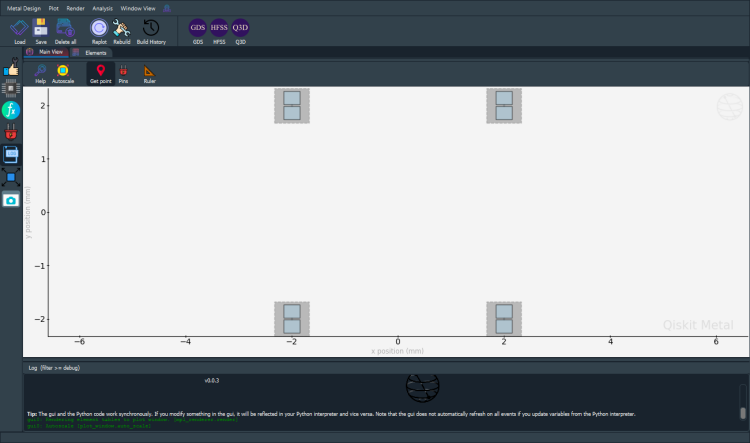

In [12]:
gui.screenshot()

Now we have four transmon qubits located at the corners of a square: (-2,-2), (-2,2), (2,2) and (2,-2). 

# Deleting a QComponent

We saw in an earlier example how to delete all QComponents in a design using the either the "design.delete_all_components" command or by using the "Delete all" button in the GUI. But what if we only want to delete specific QComponents without deleting everything in a design? 

We can delete a specific qcomponent using either the GUI or the python API. If you wish to remove a specific QComponent, you can do so using the "delete_component" or "_delete component" commands. The first takes the string reference to a Qcomponent, while the second takes an integer reference to a QComponent. Suppose we want to remove qubit 'Q1'. Presently, we do not need to pass a Boolean corresponding to whether we want to force the delete (true=1) even if the component has dependencies, or whether the deletion should not be executed in the event the QComponent does have dependencies (false=0). The bool option is for future potential possibilities of having Qcomponents with dependencies. 

In [13]:
design.delete_component('Q1')
gui.rebuild()
gui.autoscale()

We can also delete without checking for QComponent dependencies at all. In this case, we pass only the QComponent ID. As an example, we can force delete 'Q1_copy" which has QComponent ID=3 by typing:

In [14]:
design._delete_component(3)
gui.rebuild()
gui.autoscale()

# Renaming a QComponent 

In the first example in this notebook, we created a QComponent named "Pocket_1" then deleted it and created one with the name "Q1." One can also simply rename a QComponent without deleting it and creating a new one. We can rename a QComponent by using the "design_rename.component" command. For example, let's rename "Q3" and "Q4" to "Q_three" and "Q_four", respectively. Note that "Q3" has a QComponent ID of 4, while "Q4" has a Qcomponent ID of 5. 

In [15]:
design.rename_component(4,'Q_three') # rename "Q3" to "Q_three"
design.rename_component(5,'Q_four') # rename "Q4" to "Q_four"

True

# Overwriting a QComponent

In order to enable component overwrite of qcomponents with the same name, we can use the following command:

In [16]:
design.overwrite_enabled = True

This allows for the qcomponent to be modified and re-built without having to delete it. Without this line, a qcomponent would have to be deleted before recreating it with different options. 

# Closing the Qiskit Metal GUI

In [17]:
gui.main_window.close()

True